<a href="https://colab.research.google.com/github/shxvaayy/Movie-recommendation-system/blob/main/Movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
# import matplotlib.pyplot as plt
# import seaborn as sns
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
ratings.head()



,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,...,NaN,5.0,3.0,4.0,4.0,4.0,NaN,4.5,4.0,NaN
2,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()


userId,1,2,3,4,5,6,7,8,9,10,...,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,0.0,5.0,3.0,4.0,4.0,4.0,0.0,4.5,4.0,0.0
2,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

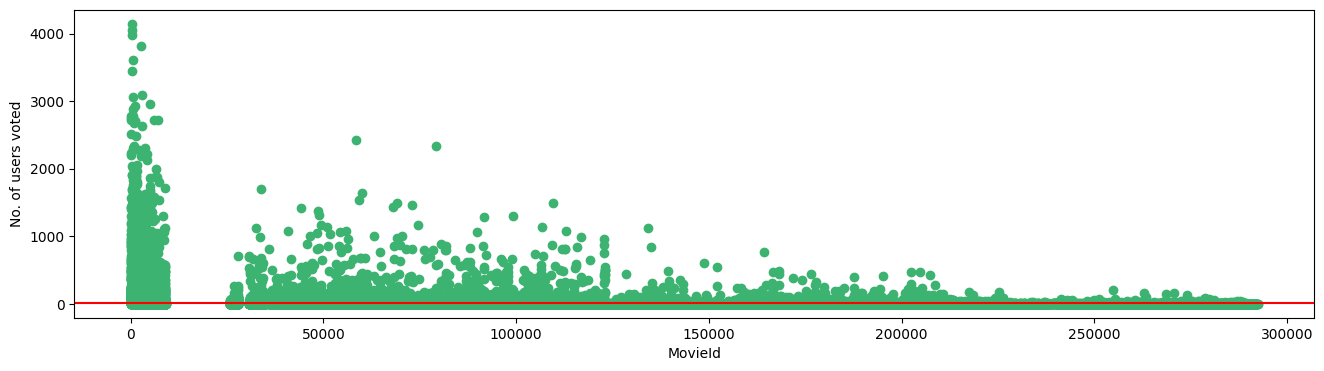

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def get_rmse(predictions, targets):
    return sqrt(mean_squared_error(predictions, targets))


In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset


NameError: name 'no_movies_voted' is not defined

In [ ]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [ ]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)


In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Star Trek (2009),0.445770
2,V for Vendetta (2006),0.445357
3,Guardians of the Galaxy (2014),0.445055
4,Inception (2010),0.426211
5,Iron Man 2 (2010),0.412568
6,Batman Begins (2005),0.399962
7,Avatar (2009),0.398867
8,WALL·E (2008),0.395848
9,"Dark Knight, The (2008)",0.376579
10,"Avengers, The (2012)",0.350245


In [ ]:
get_movie_recommendation('Memento')


,Title,Distance
1,"Usual Suspects, The (1995)",0.475476
2,"Lord of the Rings: The Return of the King, The...",0.475308
3,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",0.471553
4,Reservoir Dogs (1992),0.469845
5,Seven (a.k.a. Se7en) (1995),0.469775
6,Pulp Fiction (1994),0.459051
7,"Lord of the Rings: The Fellowship of the Ring,...",0.445897
8,Eternal Sunshine of the Spotless Mind (2004),0.438825
9,"Matrix, The (1999)",0.423673
10,Fight Club (1999),0.379580


In [ ]:
get_movie_recommendation('Mister Lonely')

,Title,Distance
1,The Shooting (1966),0.0
2,Lonesome Jim (2005),0.0
3,What Have I Done to Deserve This? (¿Qué he hec...,0.0
4,Mother's Day (1980),0.0
5,Care Bears Movie II: A New Generation (1986),0.0
6,"Château, The (2001)",0.0
7,"Joyriders, The (1999)",0.0
8,Strange Wilderness (2008),0.0
9,"Die, Mommie, Die (2003)",0.0
10,"Edge of Love, The (2008)",0.0
